In [242]:
import pandas as pd
import numpy as np

In [243]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(3)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [244]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.drop_duplicates(inplace=True)
df.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [245]:
print(f"Shape of Dataset : {df.shape}\nColumns in Dataset : {df.columns}")
print("Value in Target Column : ",df['label'].unique())

Shape of Dataset : (5169, 2)
Columns in Dataset : Index(['label', 'message'], dtype='object')
Value in Target Column :  ['ham' 'spam']


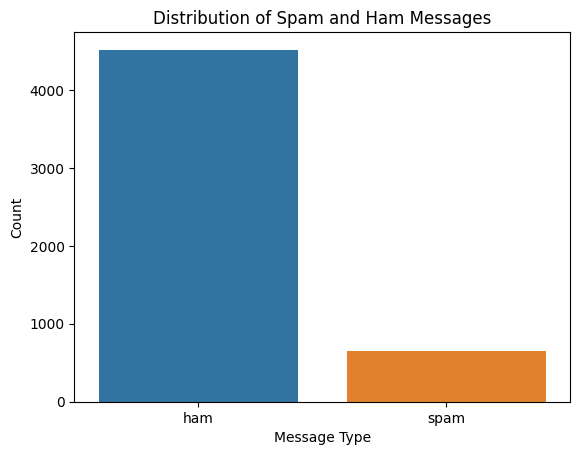

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=df, hue=df['label'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [ ]:
def Label_to_01(label):
    if(label=="ham"):
        return 1
    else:
        return 0
df['label_0/1']=df["label"].apply(Label_to_01)
print(f"Final Columns in Dataset : {df.columns}")
    

Final Columns in Dataset : Index(['label', 'message', 'label_0/1'], dtype='object')


In [248]:
from sklearn.model_selection import train_test_split
x=df['message']
y=df['label_0/1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
x_train_encode = vectorizer.fit_transform(x_train)
x_test_encode = vectorizer.transform(x_test)

In [ ]:
from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(x_train_encode, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [251]:
print("Final Model Accuracy in Percentage : ")
print("Test Accuracy: ", SVC.score(x_test_encode, y_test)*100," %")
print("Train Accuracy: ", SVC.score(x_train_encode, y_train)*100," %")


Final Model Accuracy in Percentage : 
Test Accuracy:  98.25918762088975  %
Train Accuracy:  99.97581620314389  %
